In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import phonopy
import yaml
import pickle
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections
plt.style.use(['science','grid','notebook'])
plt.rcParams['text.usetex'] = False

In [3]:
strains_band = [
           'fs--4/first_order/band.pkl',
           'fs--2/first_order/band.pkl',
           'fs-0/first_order/band.pkl',
           'fs-2/first_order/band.pkl',
           'fs-4/first_order/band.pkl'
           ]

In [4]:

# plt.figure(figsize=(3,4))


# e = strains_band[-1]

# with open(e, 'rb') as f:
#     d = pickle.load(f)

# gG1 = np.array(d['distances'])[0,:][0]
# M = np.array(d['distances'])[1,:][0]
# K = np.array(d['distances'])[2,:][0]
# gG2 = np.array(d['distances'])[2,:][-1]




# for j in range(12):
#     for i in [0,1,2]:
#         plt.plot(np.array(d['distances'])[i,:],np.array(d['frequencies'])[i,:,j], c='b',lw=2)

# plt.xlim(0,gG2)
# # plt.ylim(-15,40)
# plt.grid(False)
# plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)
# plt.yticks(fontsize=10)
# plt.axvline(x=M)
# plt.axvline(x=K)
# plt.minorticks_off()




<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:27: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_2704300/1075620085.py:27: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)
/tmp/ipykernel_2704300/1075620085.py:27: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)


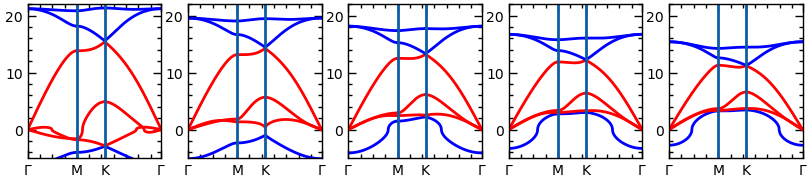

In [5]:
p=1
plt.figure(figsize=(10,2))

for e in strains_band:
# e = strains_band[0]

    with open(e, 'rb') as f:
        d = pickle.load(f)

    gG1 = np.array(d['distances'])[0,:][0]
    M = np.array(d['distances'])[1,:][0]
    K = np.array(d['distances'])[2,:][0]
    gG2 = np.array(d['distances'])[2,:][-1]

    plt.subplot(1,5,p)


    for j in range(6):
        for i in [0,1,2]:
            if 1<=j <= 3:
                plt.plot(np.array(d['distances'])[i,:],np.array(d['frequencies'])[i,:,j], c='r',lw=2)
            else:
                plt.plot(np.array(d['distances'])[i,:],np.array(d['frequencies'])[i,:,j], c='b',lw=2)
    plt.xlim(0,gG2)
    plt.ylim(-5,22)
    plt.grid(False)
    plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)
    plt.yticks(fontsize=10)
    plt.axvline(x=M)
    plt.axvline(x=K)
    # plt.minorticks_off()
    p+=1

plt.show()

In [7]:
strains_gv = [
            'fs--4/first_order/gv.pkl',
            'fs--2/first_order/gv.pkl',
            'fs-0/first_order/gv.pkl',
            'fs-2/first_order/gv.pkl',
            'fs-4/first_order/gv.pkl',
            ]

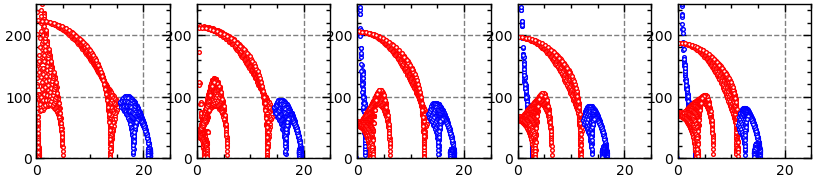

In [9]:
p=1
plt.figure(figsize=(10,2))

for e in strains_gv:
# e = strains_gv[-1]

    with open(e, 'rb') as f:

        mesh_dict = pickle.load(f)

    qpoints = mesh_dict['qpoints']
    weights = mesh_dict['weights']
    frequencies = mesh_dict['frequencies']
    eigenvectors = mesh_dict['eigenvectors']
    group_velocities = mesh_dict['group_velocities']

    group_velocity_magnitude = np.linalg.norm(group_velocities, axis=2) 


    plt.subplot(1,5,p)

    for i in range(group_velocity_magnitude.shape[1]):
        if 1<=i <=3:
            plt.scatter(frequencies[:, i], group_velocity_magnitude[:, i], s=7, c='w', edgecolor = 'r')

        else:
            plt.scatter(frequencies[:, i], group_velocity_magnitude[:, i], s=7, c='w', edgecolor = 'b')
            
        plt.xlim(0,25)
        plt.ylim(0,250)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

    p+=1
    
# plt.xlabel('Frequency (THz)',fontsize=10)
# plt.ylabel('$V_g$')
# plt.title('Phonon Group Velocities',fontsize=10)
